# <u> The National Alliance of Concurrent Enrollment Partnerships </u>
## 2015-16 Civil Rights Data Collection (CRDC)
## Advanced Placement (AP) v. Dual Enrollment (DE)
### Breaking Down all High Schools Based on AP/DE Offering Status (DE-Only, AP-Only, Both, Neither)
#### Alijah O'Connor - 2018
------------------------------------------------------------------------------------
---
For a more detailed look into the state of AP and DE offering (as well as total enrollments) in 2015-2016, the filtered high schools (for more details, see intital filtration methodology) can be broken down into four categories based on whether they only offer DE, only AP, Both, or Neither.  The results are broken down herein in the follow ways:
    - Nationally
        - Schools
        - Enrollments
    - By School 9-12th Grade Enrollment
        - Schools
        - Enrollments
    - By School Locale
        - Schools
        - Enrollments
    - By School Non-White Student Percentage
        - Schools 
        - Enrollments
    - By State
        - Schools
        - Enrollments
    - By Region
        - Schools
        - Enrollments
------------------------------------------------------------------------------------
---

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [3]:
hs_uncleaned = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

# Set Up

In [4]:
from my_functions.extra_functions import hs_enrollment_averager, missing_value_mapper
hs = hs_uncleaned.copy()
hs = hs.applymap(missing_value_mapper)
hs['total_enrollment'] = hs['TOT_ENR_M'] + hs['TOT_ENR_F']
hs['hs_total_enrollment'] = hs_enrollment_averager(hs) 

In [5]:
def make_ap_only(ap_flag, de_flag):
    if ap_flag == 'Yes' and de_flag == 'No':
        return 1
    return 0

def make_de_only(ap_flag, de_flag):
    if ap_flag =='No' and de_flag == 'Yes':
        return 1
    return 0

def make_neither(ap_flag, de_flag):
    if ap_flag == 'No' and de_flag == 'No':
        return 1
    return 0

def make_both(ap_flag, de_flag):
    if ap_flag == 'Yes' and de_flag == 'Yes':
        return 1
    return 0

In [6]:
hs['AP Only'] = hs.apply(lambda row: make_ap_only(row['SCH_APENR_IND'],row['SCH_DUAL_IND']), axis=1)
hs['DE Only'] = hs.apply(lambda row: make_de_only(row['SCH_APENR_IND'],row['SCH_DUAL_IND']), axis=1)
hs['Neither AP DE'] = hs.apply(lambda row: make_neither(row['SCH_APENR_IND'],row['SCH_DUAL_IND']), axis=1)
hs['Both AP DE'] = hs.apply(lambda row: make_both(row['SCH_APENR_IND'],row['SCH_DUAL_IND']), axis=1)

In [7]:
"""Set up DataFrames for each combination of DE/AP"""
hs_AP_Only = hs.copy()
hs_AP_Only = hs_AP_Only[hs_AP_Only['AP Only'] == 1]

hs_de_only = hs.copy()
hs_de_only = hs_de_only[hs_de_only['DE Only'] == 1]

hs_Neither_AP_DE = hs.copy()
hs_Neither_AP_DE = hs_Neither_AP_DE[hs_Neither_AP_DE['Neither AP DE'] == 1]

hs_Both_AP_DE = hs.copy()
hs_Both_AP_DE = hs_Both_AP_DE[hs_Both_AP_DE['Both AP DE'] == 1]

In [8]:
"""Additional Helper Functions for Analyses Below"""
from my_functions.extra_functions import de_ap_enrollments, add_de_ap_pcts

# Analysis
-------------------------------------------------------------------------------------------------------------------

# National

### -- Schools

In [9]:
num_total_schools = len(hs)
num_de_only_schools = len(hs_de_only)
num_AP_Only_schools = len(hs_AP_Only)
num_both_schools = len(hs_Both_AP_DE)
num_neither_schools = len(hs_Neither_AP_DE)

national_school_breakdown = pd.DataFrame({'National': 
                                         [num_de_only_schools, num_AP_Only_schools,
                                          num_both_schools, num_neither_schools, num_total_schools]}, 
                                        index = ['DE Only', 'AP Only', 'Both AP DE', 'Neither AP DE', 'Total']).T

national_school_breakdown_with_pcts = add_de_ap_pcts(national_school_breakdown)
national_school_breakdown_with_pcts

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
National,3875,20.7,3301,17.7,2045,10.9,9463,50.6,18684


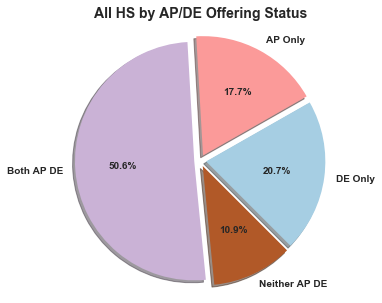

In [10]:
with plt.rc_context({'lines.linewidth': 5, 'font.weight':'bold'}):
    national_school_breakdown.T.drop('Total').plot.pie(y='National',autopct='%1.1f%%', 
                            startangle = -45, shadow = True, explode = [.05 for i in range(len(national_school_breakdown.T)-1)],
                            colormap='Paired', figsize = (5,5))
    plt.title('All HS by AP/DE Offering Status')
    plt.legend([])
    plt.ylabel('')
    plt.xticks(fontdict={'fontweight':'bold'})
    plt.axis('equal')

### -- Enrollments

In [11]:
de_ap_enrollments(hs_de_only, hs_AP_Only, hs_Neither_AP_DE, hs_Both_AP_DE)

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
HS Enrollments,965321,6.9,3079276,21.9,411909,2.9,9620163,68.3,14076669


# By School 9-12th Grade Enrollment
    - Schools were grouped into four categories based on how many students were enrolled in grades 9-12 in each one:
        - <100
        - 100 - 499
        - 500 - 1199
        - 1200+

In [12]:
from my_functions.extra_functions import school_sizer
hs_AP_Only['size_group'] = hs_AP_Only['hs_total_enrollment'].apply(lambda x: school_sizer(x))
hs_de_only['size_group'] = hs_de_only['hs_total_enrollment'].apply(lambda x: school_sizer(x))
hs_Neither_AP_DE['size_group'] = hs_Neither_AP_DE['hs_total_enrollment'].apply(lambda x: school_sizer(x))
hs_Both_AP_DE['size_group'] = hs_Both_AP_DE['hs_total_enrollment'].apply(lambda x: school_sizer(x))

In [13]:
"""Set up Grouped DataFrames"""
hs_de_only_size = hs_de_only.groupby('size_group')['LEAID'].count()
hs_de_only_size.rename('DE Only', inplace=True);

hs_AP_Only_size = hs_AP_Only.groupby('size_group')['LEAID'].count()
hs_AP_Only_size.rename('AP Only', inplace=True);

hs_Neither_AP_DE_size = hs_Neither_AP_DE.groupby('size_group')['LEAID'].count()
hs_Neither_AP_DE_size.rename('Neither AP DE', inplace=True);

hs_Both_AP_DE_size = hs_Both_AP_DE.groupby('size_group')['LEAID'].count()
hs_Both_AP_DE_size.rename('Both AP DE', inplace=True);

### -- Schools

In [14]:
by_size = pd.concat([hs_de_only_size, hs_AP_Only_size, hs_Neither_AP_DE_size, hs_Both_AP_DE_size], axis = 1)
by_size['Total'] = by_size['DE Only'] + by_size['AP Only'] + by_size['Both AP DE'] + by_size['Neither AP DE']
by_size = by_size.rename({1:'<100', 2:'100-499', 3:'500-1199', 4:'>1200'})

by_size = add_de_ap_pcts(by_size)
by_size.index.names = ['HS Student Enrollment']
by_size

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
HS Student Enrollment,,,,,,,,,
<100,1122,47.5,124,5.3,906,38.4,209,8.9,2361
100-499,2316,31.3,1190,16.1,980,13.2,2913,39.4,7399
500-1199,375,8.2,1002,22.0,133,2.9,3038,66.8,4548
>1200,62,1.4,985,22.5,26,0.6,3303,75.5,4376


### -- Enrollments

In [15]:
enrollments_by_size = de_ap_enrollments(hs_de_only, hs_AP_Only, hs_Neither_AP_DE, hs_Both_AP_DE, groupby_field = 'size_group')
enrollments_by_size = enrollments_by_size.rename({1:'<100', 2:'100-499', 3:'500-1199', 4:'>1200'})
enrollments_by_size.index.names = ['HS Student Enrollment']
enrollments_by_size

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
HS Student Enrollment,,,,,,,,,
<100,68681,52.1,7855,6.0,41074,31.1,14325,10.9,131935
100-499,543212,26.7,370301,18.2,227635,11.2,890222,43.8,2031370
500-1199,255761,7.0,795319,21.8,95076,2.6,2495019,68.5,3641175
>1200,97667,1.2,1905801,23.0,48124,0.6,6220597,75.2,8272189


# By School Locale 
    - Schools were grouped into four categories based on their locale (as defined by the NCES):
        - City: "Territory inside an Urbanized Area and inside a Principal City" 
        - Rural: "Census-defined rural territory"
        - Suburban: "Territory outside a Principal City and inside an Urbanized Area"
        - Town: "Territory inside an Urban Cluster"

In [16]:
locale_map = {11: 'City', 12: 'City', 13: 'City', 14: 'City',
              21: 'Suburban', 22: 'Suburban', 23: 'Suburban', 24: 'Suburban',
              31: 'Town', 32: 'Town', 33: 'Town', 34: 'Town',
              41: 'Rural', 42: 'Rural', 43: 'Rural', 44: 'Rural'}

In [17]:
hs_de_only['locale'] = hs_de_only['LOCALE15'].map(locale_map)
hs_AP_Only['locale'] = hs_AP_Only['LOCALE15'].map(locale_map)
hs_Neither_AP_DE['locale'] = hs_Neither_AP_DE['LOCALE15'].map(locale_map)
hs_Both_AP_DE['locale'] = hs_Both_AP_DE['LOCALE15'].map(locale_map)

In [18]:
"""Set up Grouped DataFrames"""
hs_de_only_locale = hs_de_only.groupby('locale')['LEAID'].count()
hs_de_only_locale.rename('DE Only', inplace=True);

hs_AP_Only_locale = hs_AP_Only.groupby('locale')['LEAID'].count()
hs_AP_Only_locale.rename('AP Only', inplace=True);

hs_Neither_AP_DE_locale = hs_AP_Only.groupby('locale')['LEAID'].count()
hs_Neither_AP_DE_locale.rename('Neither AP DE', inplace=True);

hs_Both_AP_DE_locale = hs_Both_AP_DE.groupby('locale')['LEAID'].count()
hs_Both_AP_DE_locale.rename('Both AP DE', inplace=True);

### -- Schools

In [19]:
by_locale = pd.concat([hs_de_only_locale, hs_AP_Only_locale, hs_Neither_AP_DE_locale, hs_Both_AP_DE_locale], axis = 1)
by_locale['Total'] = by_locale['DE Only'] + by_locale['AP Only'] + by_locale['Both AP DE'] + by_locale['Neither AP DE']

by_locale = add_de_ap_pcts(by_locale)
by_locale.index.names = ['Locale']
by_locale

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
Locale,,,,,,,,,
City,337,7.2,1187,25.4,1187,25.4,1968,42.1,4679
Rural,2718,37.5,693,9.6,693,9.6,3135,43.3,7239
Suburban,268,5.1,1068,20.3,1068,20.3,2861,54.3,5265
Town,552,20.0,353,12.8,353,12.8,1499,54.4,2757


### -- Enrollments

In [20]:
locale_enrollments = de_ap_enrollments(hs_de_only, hs_AP_Only, 
                                       hs_Neither_AP_DE, hs_Both_AP_DE, groupby_field = 'locale')
locale_enrollments.index.names = ['Locale']
locale_enrollments

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
Locale,,,,,,,,,
City,138677,3.4,1134989,28.1,167180,4.1,2602530,64.4,4043376
Rural,483935,17.4,337060,12.1,104517,3.8,1857241,66.7,2782753
Suburban,125741,2.2,1365559,24.2,84305,1.5,4075341,72.1,5650946
Town,216968,13.6,241668,15.1,55907,3.5,1085051,67.8,1599594


# By School Non-White Student Percentage

In [21]:
hs_de_only['pct_eth'] = (hs_de_only['total_enrollment'] - hs_de_only['SCH_ENR_WH_F'] - hs_de_only['SCH_ENR_WH_M']) / hs_de_only['total_enrollment'] 
hs_AP_Only['pct_eth'] = (hs_AP_Only['total_enrollment'] - hs_AP_Only['SCH_ENR_WH_F'] - hs_AP_Only['SCH_ENR_WH_M']) / hs_AP_Only['total_enrollment'] 
hs_Neither_AP_DE['pct_eth'] = (hs_Neither_AP_DE['total_enrollment'] - hs_Neither_AP_DE['SCH_ENR_WH_F'] - hs_Neither_AP_DE['SCH_ENR_WH_M']) / hs_Neither_AP_DE['total_enrollment'] 
hs_Both_AP_DE['pct_eth'] = (hs_Both_AP_DE['total_enrollment'] - hs_Both_AP_DE['SCH_ENR_WH_F'] - hs_Both_AP_DE['SCH_ENR_WH_M']) / hs_Both_AP_DE['total_enrollment'] 

from my_functions.extra_functions import eth_grouper

hs_de_only['eth_quintile'] = hs_de_only['pct_eth'].apply(lambda x: eth_grouper(x))
hs_AP_Only['eth_quintile'] = hs_AP_Only['pct_eth'].apply(lambda x: eth_grouper(x))
hs_Neither_AP_DE['eth_quintile'] = hs_Neither_AP_DE['pct_eth'].apply(lambda x: eth_grouper(x))
hs_Both_AP_DE['eth_quintile'] = hs_Both_AP_DE['pct_eth'].apply(lambda x: eth_grouper(x))

In [22]:
"""Set up Grouped DataFrames"""
hs_de_only_eth = hs_de_only.groupby('eth_quintile')['LEAID'].count()
hs_de_only_eth.rename('DE Only', inplace = True);

hs_AP_Only_eth = hs_AP_Only.groupby('eth_quintile')['LEAID'].count()
hs_AP_Only_eth.rename('AP Only', inplace = True);

hs_Neither_AP_DE_eth = hs_Neither_AP_DE.groupby('eth_quintile')['LEAID'].count()
hs_Neither_AP_DE_eth.rename('Neither AP DE', inplace = True);

hs_Both_AP_DE_eth = hs_Both_AP_DE.groupby('eth_quintile')['LEAID'].count()
hs_Both_AP_DE_eth.rename('Both AP DE', inplace = True);

### -- Schools

In [33]:
by_eth = pd.concat([hs_de_only_eth, hs_AP_Only_eth, hs_Neither_AP_DE_eth, hs_Both_AP_DE_eth], axis = 1)
by_eth['Total'] = by_eth['DE Only'] + by_eth['AP Only'] + by_eth['Both AP DE'] + by_eth['Neither AP DE']
by_eth = by_eth.rename({1:'0-20%', 2:'21-40%', 3:'41-60%', 4:'61-80%', 5:'81-100%'})

by_eth = add_de_ap_pcts(by_eth)
by_eth.index.name = 'Non-White %'
by_eth

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
Non-White %,,,,,,,,,
0-20%,2134,30.0,843,11.8,603,8.5,3543,49.7,7123
21-40%,699,19.9,508,14.5,313,8.9,1986,56.6,3506
41-60%,351,14.5,422,17.5,237,9.8,1406,58.2,2416
61-80%,239,13.1,413,22.6,220,12.0,954,52.2,1826
81-100%,452,11.9,1115,29.2,672,17.6,1574,41.3,3813


### -- Enrollments

In [24]:
enrollment_by_eth = de_ap_enrollments(hs_de_only, hs_AP_Only, hs_Neither_AP_DE, hs_Both_AP_DE, groupby_field = 'eth_quintile')
enrollment_by_eth = enrollment_by_eth.rename({1:'0-20%', 2:'21-40%', 3:'41-60%', 4:'61-80%', 5:'81-100%'})
enrollment_by_eth.index.names = ['Non-White %']
enrollment_by_eth

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
Non-White %,,,,,,,,,
0-20%,475225,13.6,539882,15.4,97349,2.8,2383160,68.2,3495616
21-40%,169099,5.7,483055,16.4,56269,1.9,2238768,76.0,2947191
41-60%,102901,4.2,508840,20.8,44633,1.8,1787643,73.1,2444017
61-80%,79672,4.2,519079,27.1,47934,2.5,1266426,66.2,1913111
81-100%,138424,4.2,1028420,31.4,165724,5.1,1944166,59.3,3276734


# By State

In [25]:
"""Which states have many schools offering DE but not AP?"""
hs_de_only_state = hs_de_only.groupby('LEA_STATE')['LEAID'].count().rename('DE Only')
hs_AP_Only_state = hs_AP_Only.groupby('LEA_STATE')['LEAID'].count().rename('AP Only')
hs_Neither_AP_DE_state = hs_Neither_AP_DE.groupby('LEA_STATE')['LEAID'].count().rename('Neither AP DE')
hs_Both_AP_DE_state = hs_Both_AP_DE.groupby('LEA_STATE')['LEAID'].count().rename('Both AP DE')

### -- Schools

In [26]:
by_state = pd.concat([hs_de_only_state, hs_AP_Only_state, hs_Neither_AP_DE_state, hs_Both_AP_DE_state], axis = 1)
by_state = by_state.fillna(0).astype(int)
by_state['Total'] = by_state['DE Only'] + by_state['AP Only'] + by_state['Both AP DE'] + by_state['Neither AP DE']

by_state = add_de_ap_pcts(by_state)
by_state.index.names = ['State']
by_state

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
State,,,,,,,,,
AK,68,28.0,13,5.3,133,54.7,29,11.9,243
AL,100,28.2,28,7.9,27,7.6,200,56.3,355
AR,12,4.4,57,20.8,6,2.2,199,72.6,274
AZ,58,14.4,69,17.1,155,38.4,122,30.2,404
CA,72,5.0,747,52.1,198,13.8,416,29.0,1433
CO,98,27.2,40,11.1,32,8.9,190,52.8,360
CT,22,10.7,61,29.6,13,6.3,110,53.4,206
DC,0,0.0,22,75.9,1,3.4,6,20.7,29
DE,5,13.9,10,27.8,1,2.8,20,55.6,36


### -- Enrollments

In [27]:
enrollments_by_state = de_ap_enrollments(hs_de_only, hs_AP_Only, hs_Neither_AP_DE, hs_Both_AP_DE, groupby_field = 'LEA_STATE')
enrollments_by_state.index.names = ['State']
enrollments_by_state

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
State,,,,,,,,,
AK,4060,11.7,8650,24.9,4120,11.9,17872,51.5,34702
AL,30517,14.7,18741,9.0,8398,4.0,150118,72.3,207774
AR,2079,1.6,28372,22.0,2178,1.7,96046,74.6,128675
AZ,14986,4.8,73449,23.3,29884,9.5,196319,62.4,314638
CA,18812,1.1,1062092,60.9,53238,3.1,609230,34.9,1743372
CO,17606,7.4,26006,10.9,3582,1.5,190443,80.1,237637
CT,10819,6.7,51948,32.0,3091,1.9,96514,59.4,162372
DC,0,0.0,11954,82.3,153,1.1,2423,16.7,14530
DE,4801,12.7,9917,26.2,307,0.8,22833,60.3,37858


# By Region
    - Regions are broken down according to the regional accreditation guidelines.
    
        - Higher Learning Commission (HLC): Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan,
          Minnesota, Missouri, North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, 
          West Virginia, and Wyoming. 
          
        - Middle States Commission on Higher Education (MSCHE): New York, New Jersey, Pennsylvania, Delaware, 
          Maryland, the District of Columbia.
          
        - New England Association of Schools and Colleges (NEASC): Connecticut, Maine, Massachusetts, New Hampshire,
          Rhode Island, and Vermont.
          
        - Northwest Commission on Colleges and Universities (NWCCU): Alaska, Idaho, Montana, Nevada, Oregon, 
          Utah, and Washington. 
          
        - Southern Association of Colleges and Schools (SACS): Alabama, Florida, Georgia, Kentucky, 
          Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, Texas and Virginia.
          
        - Western Association of Schools and Colleges (WASC): Hawaii, California 

In [28]:
"""Set up the Region Column"""
from my_functions.extra_functions import region_mapper
hs_de_only['region_accred'] = hs_de_only['LEA_STATE'].apply(lambda x: region_mapper(x))
hs_AP_Only['region_accred'] = hs_AP_Only['LEA_STATE'].apply(lambda x: region_mapper(x))
hs_Neither_AP_DE['region_accred'] = hs_Neither_AP_DE['LEA_STATE'].apply(lambda x: region_mapper(x))
hs_Both_AP_DE['region_accred'] = hs_Both_AP_DE['LEA_STATE'].apply(lambda x: region_mapper(x))

In [29]:
"""Set up Grouped DataFrames"""
hs_de_only_region = hs_de_only.groupby('region_accred')['LEAID'].count()
hs_de_only_region.rename('DE Only', inplace=True);

hs_AP_Only_region = hs_AP_Only.groupby('region_accred')['LEAID'].count()
hs_AP_Only_region.rename('AP Only', inplace=True);

hs_Neither_AP_DE_region = hs_Neither_AP_DE.groupby('region_accred')['LEAID'].count()
hs_Neither_AP_DE_region.rename('Neither AP DE', inplace=True);

hs_Both_AP_DE_region = hs_Both_AP_DE.groupby('region_accred')['LEAID'].count()
hs_Both_AP_DE_region.rename('Both AP DE', inplace=True);

### -- Schools

In [30]:
by_region = pd.concat([hs_de_only_region, hs_AP_Only_region, hs_Neither_AP_DE_region, hs_Both_AP_DE_region], axis = 1)
by_region['Total'] = by_region['DE Only'] + by_region['AP Only'] + by_region['Both AP DE'] + by_region['Neither AP DE']

by_region = add_de_ap_pcts(by_region)
by_region.index.names = ['Region']
by_region

,DE Only,% DE-Only Schools in Group,AP Only,% AP-Only Schools in Group,Neither AP DE,% Neither Schools in Group,Both AP DE,% Both Schools in Group,Total
Region,,,,,,,,,
HLC,2173,30.3,661,9.2,902,12.6,3425,47.8,7161
MSCHE,195,7.5,877,33.8,262,10.1,1257,48.5,2591
NEASC,79,8.9,311,35.1,69,7.8,427,48.2,886
NWCCU,381,25.9,222,15.1,324,22.0,543,36.9,1470
SACS,959,18.9,483,9.5,284,5.6,3353,66.0,5079
WASC,88,5.9,747,49.9,204,13.6,458,30.6,1497


### -- Enrollments

In [31]:
de_ap_enrollments(hs_de_only, hs_AP_Only, hs_Neither_AP_DE, hs_Both_AP_DE, groupby_field = 'region_accred')

,HS Students in DE-Only Schools,% DE-Only Schools,HS Students in AP-Only Schools,% AP-Only Schools,HS Students in Schools w/ Neither,% Neither Schools,HS Students in Schools w/ Both,% Both Schools,Total
region_accred,,,,,,,,,
HLC,481468,11.9,492097,12.2,168253,4.2,2906939,71.8,4048757
MSCHE,71589,3.5,649871,32.2,81571,4.0,1213937,60.2,2016968
NEASC,31856,5.2,251997,40.9,15701,2.5,316730,51.4,616284
NWCCU,91178,10.2,214744,23.9,30817,3.4,561358,62.5,898097
SACS,268243,5.7,408475,8.7,61992,1.3,3963986,84.3,4702696
WASC,20987,1.2,1062092,59.2,53575,3.0,657213,36.6,1793867
